学习使用R语言Cox模型

# Cox模型

In [3]:
library(survminer)
library(survival)
df <- survival::rotterdam
df <- df %>% mutate(dtime_yrs = dtime/365.25,
  status = death
)

# 拟合Cox比例风险模型 
fit_cox <- coxph(
  Surv(dtime_yrs, status) ~ hormon + chemo + size +
    er + pgr + nodes + meno + grade + age,
  data = df
)
# 查看模型结果
summary(fit_cox)

Call:
coxph(formula = Surv(dtime_yrs, status) ~ hormon + chemo + size + 
    er + pgr + nodes + meno + grade + age, data = df)

  n= 2982, number of events= 1272 

                coef  exp(coef)   se(coef)      z Pr(>|z|)    
hormon    -6.553e-02  9.366e-01  8.840e-02 -0.741 0.458535    
chemo      5.032e-02  1.052e+00  8.198e-02  0.614 0.539342    
size20-50  4.425e-01  1.557e+00  6.536e-02  6.771 1.28e-11 ***
size>50    8.222e-01  2.276e+00  9.142e-02  8.993  < 2e-16 ***
er        -5.512e-05  9.999e-01  1.107e-04 -0.498 0.618466    
pgr       -3.676e-04  9.996e-01  1.226e-04 -2.998 0.002720 ** 
nodes      7.295e-02  1.076e+00  4.879e-03 14.953  < 2e-16 ***
meno       7.046e-02  1.073e+00  1.006e-01  0.701 0.483583    
grade      3.156e-01  1.371e+00  7.082e-02  4.456 8.33e-06 ***
age        1.406e-02  1.014e+00  3.830e-03  3.671 0.000242 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

          exp(coef) exp(-coef) lower .95 upper .95
hormon       0.9366     

In [4]:
# 使用Breslow方法
# 拟合Cox比例风险模型 
fit_cox <- coxph(
  Surv(dtime_yrs, status) ~ hormon + chemo + size +
    er + pgr + nodes + meno + grade + age,
  data = df,
  method = "breslow"
)
# 查看模型结果
summary(fit_cox)

Call:
coxph(formula = Surv(dtime_yrs, status) ~ hormon + chemo + size + 
    er + pgr + nodes + meno + grade + age, data = df, method = "breslow")

  n= 2982, number of events= 1272 

                coef  exp(coef)   se(coef)      z Pr(>|z|)    
hormon    -6.549e-02  9.366e-01  8.840e-02 -0.741 0.458759    
chemo      5.034e-02  1.052e+00  8.198e-02  0.614 0.539171    
size20-50  4.425e-01  1.557e+00  6.536e-02  6.770 1.29e-11 ***
size>50    8.221e-01  2.275e+00  9.142e-02  8.993  < 2e-16 ***
er        -5.511e-05  9.999e-01  1.107e-04 -0.498 0.618537    
pgr       -3.676e-04  9.996e-01  1.226e-04 -2.998 0.002722 ** 
nodes      7.294e-02  1.076e+00  4.878e-03 14.951  < 2e-16 ***
meno       7.048e-02  1.073e+00  1.006e-01  0.701 0.483488    
grade      3.156e-01  1.371e+00  7.082e-02  4.456 8.35e-06 ***
age        1.406e-02  1.014e+00  3.830e-03  3.670 0.000242 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

          exp(coef) exp(-coef) lower .95 upper .95
horm

In [5]:
# 稳健标准误
# 拟合Cox比例风险模型 
fit_cox <- coxph(
  Surv(dtime_yrs, status) ~ hormon + chemo + size +
    er + pgr + nodes + meno + grade + age,
  data = df,
  robust = TRUE
)
# 查看模型结果
summary(fit_cox)

Call:
coxph(formula = Surv(dtime_yrs, status) ~ hormon + chemo + size + 
    er + pgr + nodes + meno + grade + age, data = df, robust = TRUE)

  n= 2982, number of events= 1272 

                coef  exp(coef)   se(coef)  robust se      z Pr(>|z|)    
hormon    -6.553e-02  9.366e-01  8.840e-02  8.805e-02 -0.744 0.456768    
chemo      5.032e-02  1.052e+00  8.198e-02  8.841e-02  0.569 0.569244    
size20-50  4.425e-01  1.557e+00  6.536e-02  6.543e-02  6.764 1.34e-11 ***
size>50    8.222e-01  2.276e+00  9.142e-02  9.612e-02  8.554  < 2e-16 ***
er        -5.512e-05  9.999e-01  1.107e-04  1.105e-04 -0.499 0.617992    
pgr       -3.676e-04  9.996e-01  1.226e-04  1.229e-04 -2.991 0.002778 ** 
nodes      7.295e-02  1.076e+00  4.879e-03  6.709e-03 10.874  < 2e-16 ***
meno       7.046e-02  1.073e+00  1.006e-01  1.057e-01  0.667 0.504896    
grade      3.156e-01  1.371e+00  7.082e-02  6.919e-02  4.562 5.08e-06 ***
age        1.406e-02  1.014e+00  3.830e-03  4.113e-03  3.418 0.000631 ***
---
Sig

# 比例风险假设

## KM曲线

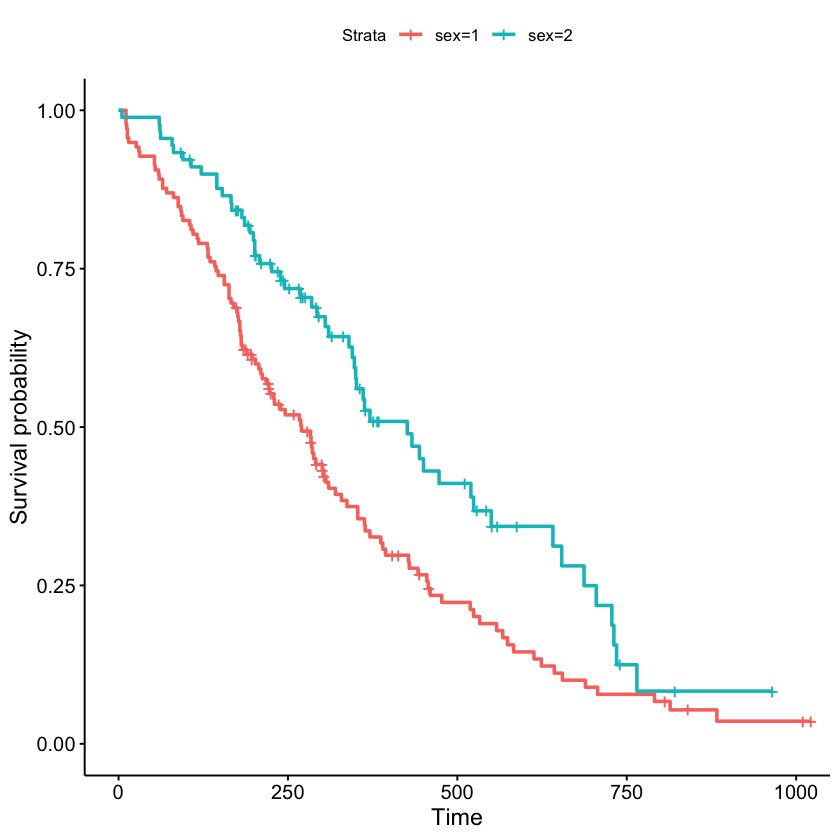

In [7]:
fit_KM <- survfit(
  Surv(time, status) ~ sex,
  data = lung
)

ggsurvplot(
  fit_KM,
  data = lung,
  pval = FALSE,
  conf.int = FALSE,
  risk.table = FALSE,
)

## 对数对数图

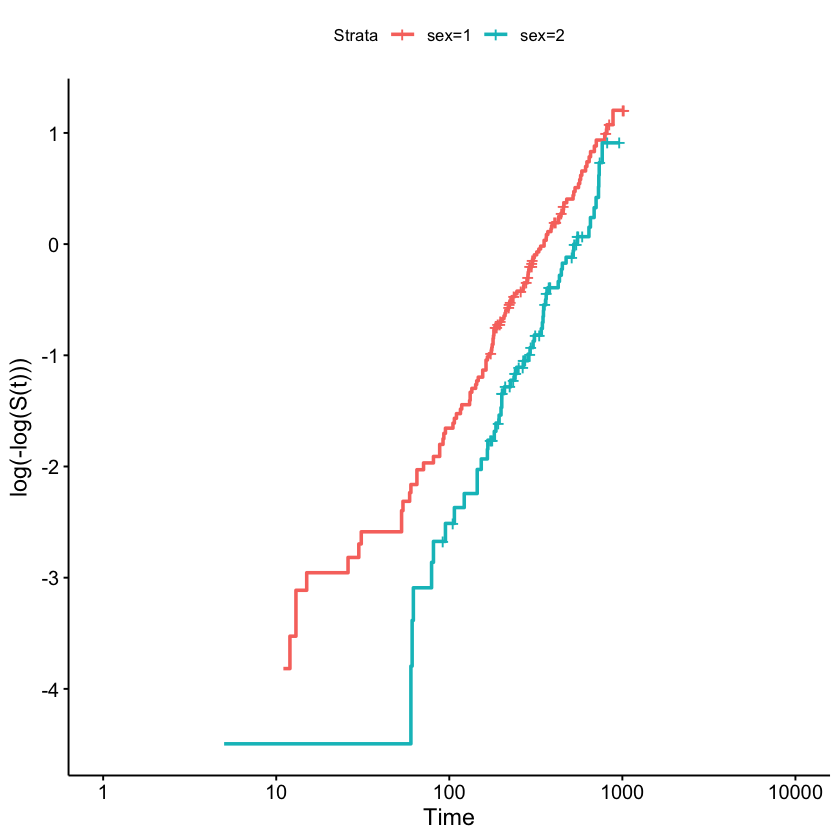

In [14]:
fit_KM <- survfit(
  Surv(time, status) ~ sex,
  data = lung
)

ggsurvplot(
  fit_KM,
  data = lung,
  pval = FALSE,
  conf.int = FALSE,
  risk.table = FALSE,
  fun = "cloglog"
)

In [23]:
# 绘制对数对数图
log_log_plot <- function(data, valeu, label) {
  # value为treat的值
  # label为treat的标签
  library(survival)
  library(survminer)
  library(ggplot2)

  # 拟合Kaplan-Meier曲线
  fit_1 <- survfit(Surv(time, status) ~ sex == value[1], data = data)
  fit_2 <- survfit(Surv(time, status) ~ sex == value[2], data = data)

  # 提取累积风险
  cumhaz_1 <- fit_1$cumhaz
  cumhaz_2 <- fit_2$cumhaz
  
  # 合成数据
  df_1 <- data.frame(x = log(fit_1$time), y = log(cumhaz_1), treat = label[1])
  df_2 <- data.frame(x = log(fit_2$time), y = log(cumhaz_2), treat = label[2])
  data <- rbind(df_1, df_2)

  # 绘制对数对数图
  ggplot(data, aes(x = x, y = y, color = treat)) +
    geom_line() +
    labs(title = "Log-Log plot",
         x = "log(Time)",
         y = "log(-log(Survival))") +
    theme_minimal()
}

In [38]:
head(lung)

,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,3,306,2,74,1,1,90,100,1175,NA
2,3,455,2,68,1,0,90,90,1225,15
3,3,1010,1,56,1,0,90,90,NA,15
4,5,210,2,57,1,1,90,60,1150,11
5,1,883,2,60,1,0,100,90,NA,0
6,12,1022,1,74,1,1,50,80,513,0


Warning message in data(lung):
"data set 'lung' not found"


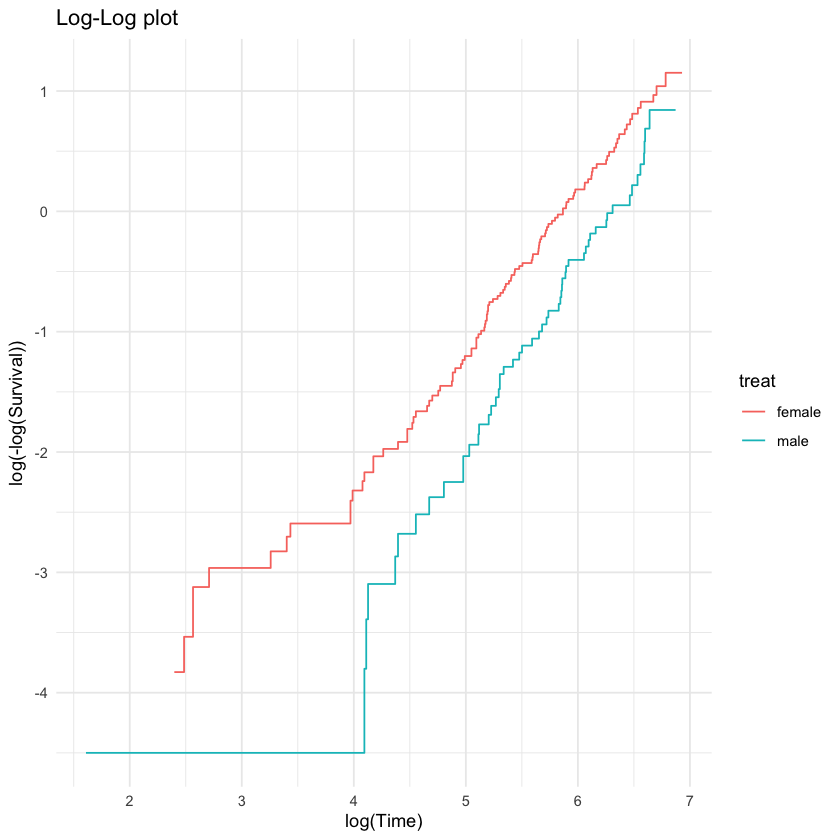

In [43]:
# 加载必要的包
library(survival)
library(survminer)
library(tidyverse)

# 使用lung数据集
data(lung)
df <- lung

# 定义value和label
value <- c(1, 2)
label <- c("female", "male")

# 分别提取数据
df_1 <- df %>%
  filter(sex == value[1])
df_2 <- df %>%
  filter(sex == value[2])

# 分别拟合模型
fit_1 <- survfit(
  Surv(time, status) ~ 1,
  data = df_1
)
fit_2 <- survfit(
  Surv(time, status) ~ 1,
  data = df_2
)

# 提取累积风险
cumhaz_1 <- fit_1$cumhaz
cumhaz_2 <- fit_2$cumhaz

# 合成数据
df_pic_1 <- data.frame(x = log(fit_1$time), y = log(cumhaz_1), treat = label[1])
df_pic_2 <- data.frame(x = log(fit_2$time), y = log(cumhaz_2), treat = label[2])
df_pic <- rbind(df_pic_1, df_pic_2)

# 绘制对数对数图
ggplot(df_pic, aes(x = x, y = y, color = treat)) +
  geom_step() +
  labs(title = "Log-Log plot",
       x = "log(Time)",
       y = "log(-log(Survival))") +
  theme_minimal()

In [64]:
log_log_plot <- function(data, value, label) {
  # 默认是两组比较
  # value为treat的值
  # label为treat的标签
  library(survival)
  library(survminer)
  library(tidyverse)

  # 分别提取数据
  df_1 <- data |>
    filter(treat == value[1])
  df_2 <- data |>
    filter(treat == value[2])
  
  # 分别拟合模型
  fit_1 <- survfit(
    Surv(time, status) ~ 1,
    data = df_1
  )
  fit_2 <- survfit(
    Surv(time, status) ~ 1,
    data = df_2
  )

  # 提取累积风险
  cumhaz_1 <- fit_1$cumhaz
  cumhaz_2 <- fit_2$cumhaz

  # 合成数据
  df_pic_1 <- data.frame(x = log(fit_1$time), y = log(cumhaz_1), treat = label[1])
  df_pic_2 <- data.frame(x = log(fit_2$time), y = log(cumhaz_2), treat = label[2])
  df_pic <- rbind(df_pic_1, df_pic_2)

  # 绘制对数对数图
  # 添加标签
  ggplot(df_pic, aes(x = x, y = y, color = treat)) +
    geom_step() +
    labs(title = "Log-Log plot",
         x = "log(Time)",
         y = "log(-log(Survival))") +
    theme_minimal()
}



In [54]:
# 导入DB04数据
DB04_chem_PFS <- read.csv(
  "./DB04-PFS(ICC).csv",
  header = FALSE
)

DB04_TD_PFS <- read.csv(
  "./DB04-PFS(T-Dxd).csv",
  header = FALSE
)

In [56]:
# IPD数据提取一步化函数
get_IPD_from_KM <- function(data, trisk, nrisk, totalpts, arm){
  # 预处理数据
  data_pre <- preprocess(
    dat = data,
    trisk = trisk,
    nrisk = nrisk,
    totalpts = totalpts,
    maxy = 1
  )

  # 重构IPD数据
  data_IPD <-  getIPD(
    prep = data_pre,
    armID = arm
  )

  # 返回结果
  return(data_IPD)
}

In [57]:
library(IPDfromKM)

# 设定trisk
DB04_TD_PFS_trisk <- c(0:29)

# 设定nrisk
DB04_TD_PFS_nrisk <- c(
  331, 324, 290, 265, 262, 248,
  218, 198, 182, 165, 142,
  128, 107, 89, 78, 73, 
  64, 48, 37, 31, 28,
  17, 14, 12, 7, 4,
  4, 1, 1, 0
)

DB04_TD_PFS_IPD <- get_IPD_from_KM(
  data = DB04_TD_PFS,
  trisk = DB04_TD_PFS_trisk,
  nrisk = DB04_TD_PFS_nrisk,
  totalpts = 331,
  arm = 1
)

# 设定trisk
DB04_chem_PFS_trisk <- c(0:26)

# 设定nrisk
DB04_chem_PFS_nrisk <- c(
  163, 146, 105, 85, 84,
  69, 57, 48, 43, 32,
  30, 27, 24, 20, 14,
  12, 8, 4, 3, 2,
  1, 1, 1, 1, 1,
  1, 0
)

DB04_chem_PFS_IPD <- get_IPD_from_KM(
  data = DB04_chem_PFS,
  trisk = DB04_chem_PFS_trisk,
  nrisk = DB04_chem_PFS_nrisk,
  totalpts = 163,
  arm = 2
)

In [62]:
# 合并数据
DB04_PFS_IPD <- rbind(DB04_TD_PFS_IPD$IPD, DB04_chem_PFS_IPD$IPD)
DB04_PFS_IPD

time,status,treat
<dbl>,<dbl>,<dbl>
0.3231434,0,1
0.3231434,0,1
0.3231434,0,1
0.3231434,0,1
0.6462868,1,1
0.6462868,1,1
0.7708028,0,1
1.1443509,1,1
1.1443509,1,1


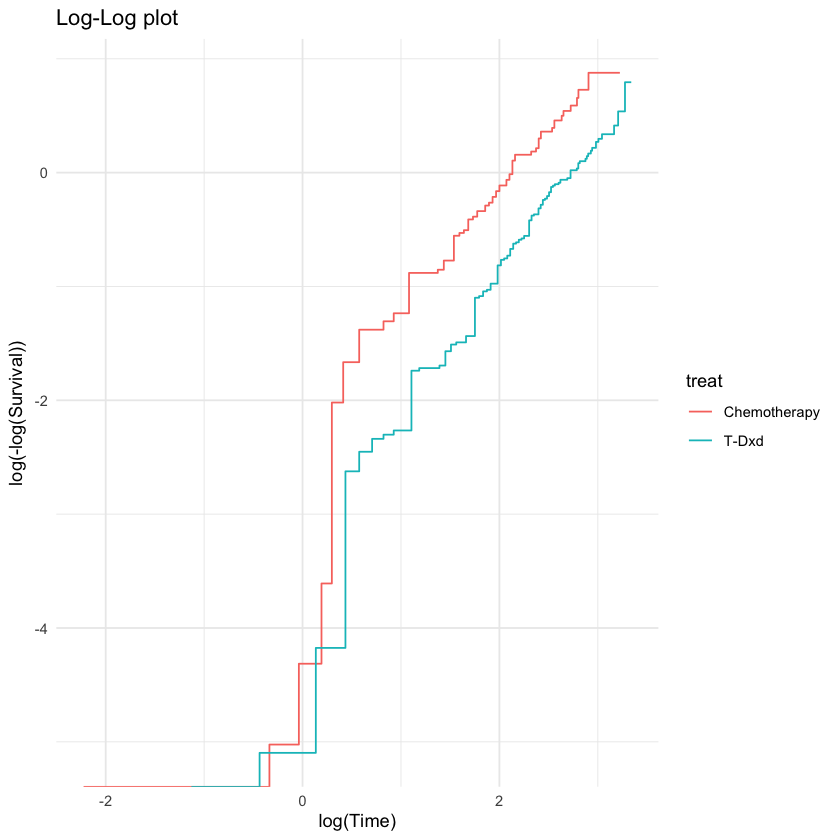

In [63]:
# 绘制对数对数图
log_log_plot(DB04_PFS_IPD, c(1, 2), c("T-Dxd", "Chemotherapy"))

## 观测预测图

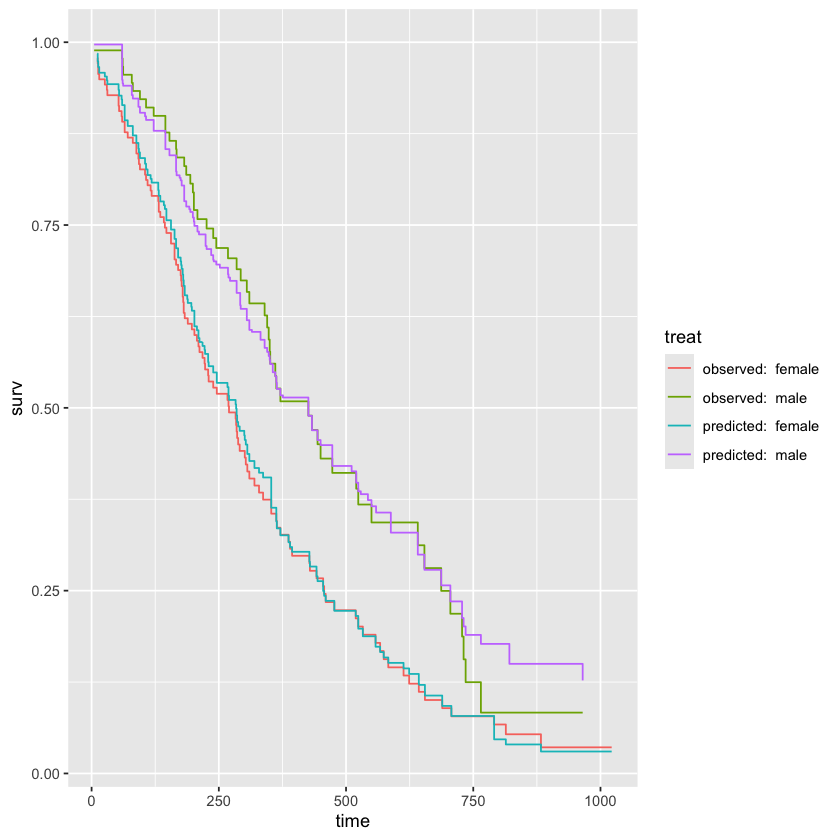

In [10]:
library(tidyverse)
library(survminer)
library(survival)

df = lung

# 定义标签值
value = c(1, 2)
label = c("female", "male")

# 分别提取数据
df_1 <- df %>%
  filter(sex == value[1])
df_2 <- df %>%
  filter(sex == value[2])

# 分别拟合模型
fit_observe_1 <- survfit(
  Surv(time, status) ~ 1,
  data = df_1
)
fit_observe_2 <- survfit(
  Surv(time, status) ~ 1,
  data = df_2
)

# 合成数据集
df_observe_1 <- data.frame(
  time = fit_observe_1$time,
  surv = fit_observe_1$surv,
  treat = paste("observed: ", label[1])
)
df_observe_2 <- data.frame(
  time = fit_observe_2$time,
  surv = fit_observe_2$surv,
  treat = paste("observed: ", label[2])
)

# 分别绘制两组的预测生存概率
fit_cox <- coxph(
  Surv(time, status) ~ sex,
  data = df
)

# 提取生存概率
predict_cox <- predict(fit_cox, type = "survival")

# 合成数据
df_predict <- data.frame(
  time = df$time,
  surv = predict_cox,
  treat = df$sex
)
df_predict <- df_predict %>%
  mutate(
    treat = ifelse(
      treat == value[1],
      paste("predicted: ", label[1]),
      paste("predicted: ", label[2])
    )
  )

# 合成数据
df_plot <- rbind(df_observe_1, df_observe_2, df_predict)

# 数据排序
df_plot <- df_plot %>%
  arrange(time)

# 绘制预测生存概率
ggplot(df_plot, aes(x = time, y = surv, color = treat
)) +
  geom_step()

In [11]:
# 打包为函数
observe_predict_plot <- function(df, value, label) {
  # data为数据集
  # value为treat的值，两个值
  # label为treat的标签，两个标签

  # 加载必要的包
  library(tidyverse)
  library(survminer)
  library(survival)

  # 分别提取数据
  df_1 <- df %>%
    filter(treat == value[1])
  df_2 <- df %>%
    filter(treat == value[2])

  # 分别拟合模型
  fit_observe_1 <- survfit(
    Surv(time, status) ~ 1,
    data = df_1
  )
  fit_observe_2 <- survfit(
    Surv(time, status) ~ 1,
    data = df_2
  )

  # 合成数据集
  df_observe_1 <- data.frame(
    time = fit_observe_1$time,
    surv = fit_observe_1$surv,
    treat = paste("observed: ", label[1])
  )
  df_observe_2 <- data.frame(
    time = fit_observe_2$time,
    surv = fit_observe_2$surv,
    treat = paste("observed: ", label[2])
  )

  # 分别绘制两组的预测生存概率
  fit_cox <- coxph(
    Surv(time, status) ~ treat,
    data = df
  )

  # 提取生存概率
  predict_cox <- predict(fit_cox, type = "survival")

  # 合成数据
  df_predict <- data.frame(
    time = df$time,
    surv = predict_cox,
    treat = df$treat
  )
  df_predict <- df_predict %>%
    mutate(
      treat = ifelse(
        treat == value[1],
        paste("predicted: ", label[1]),
        paste("predicted: ", label[2])
      )
    )

  # 合成数据
  df_plot <- rbind(df_observe_1, df_observe_2, df_predict)

  # 数据排序
  df_plot <- df_plot %>%
    arrange(time)

  # 绘制预测生存概率
  ggplot(df_plot, aes(x = time, y = surv, color = treat
  )) +
    geom_step()
}

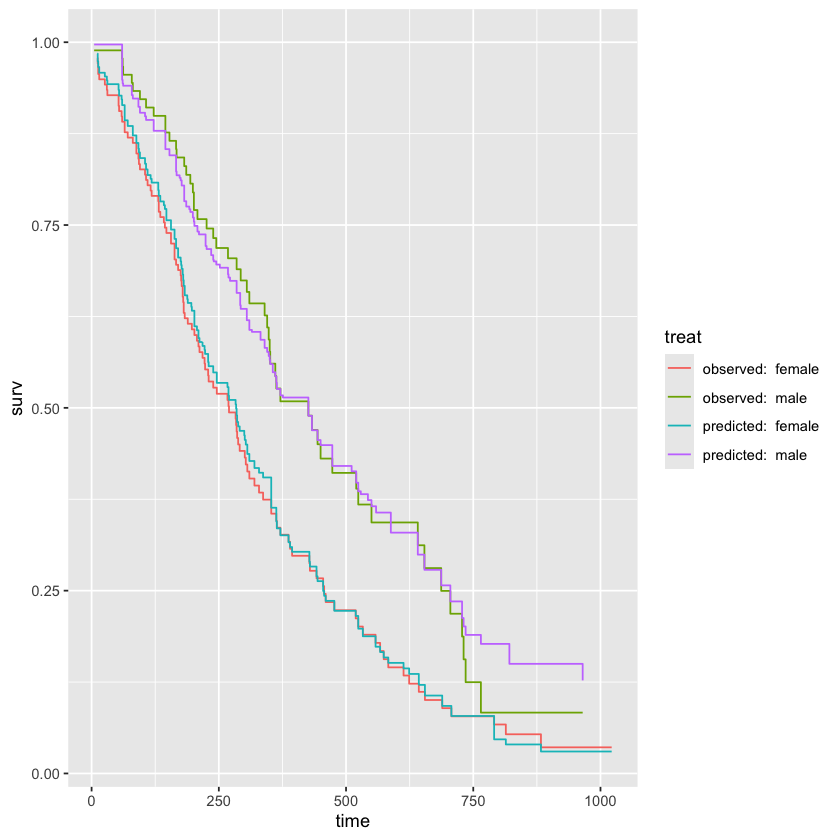

In [12]:
df = lung
df <- df %>%
  mutate(
    treat = sex
  )

observe_predict_plot(df, c(1, 2), c("female", "male"))

Loading required package: gridExtra


Attaching package: 'gridExtra'


The following object is masked from 'package:dplyr':

    combine


Loading required package: readbitmap



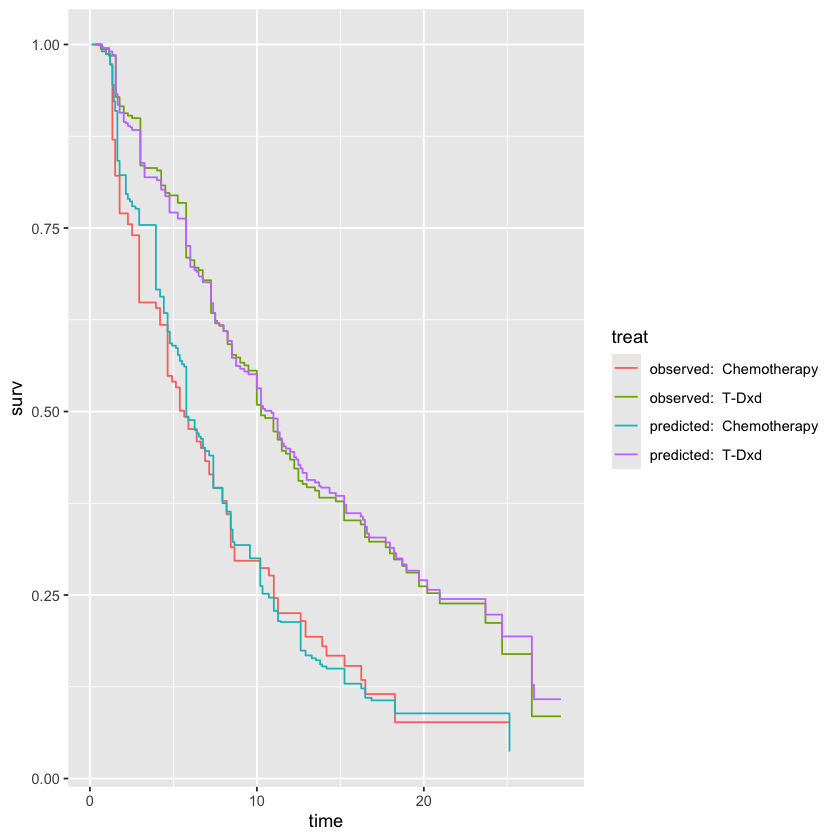

In [13]:
# 导入DB04数据
DB04_chem_PFS <- read.csv(
  "./DB04-PFS(ICC).csv",
  header = FALSE
)

DB04_TD_PFS <- read.csv(
  "./DB04-PFS(T-Dxd).csv",
  header = FALSE
)

# IPD数据提取一步化函数
get_IPD_from_KM <- function(data, trisk, nrisk, totalpts, arm){
  # 预处理数据
  data_pre <- preprocess(
    dat = data,
    trisk = trisk,
    nrisk = nrisk,
    totalpts = totalpts,
    maxy = 1
  )

  # 重构IPD数据
  data_IPD <-  getIPD(
    prep = data_pre,
    armID = arm
  )

  # 返回结果
  return(data_IPD)
}

library(IPDfromKM)

# 设定trisk
DB04_TD_PFS_trisk <- c(0:29)

# 设定nrisk
DB04_TD_PFS_nrisk <- c(
  331, 324, 290, 265, 262, 248,
  218, 198, 182, 165, 142,
  128, 107, 89, 78, 73, 
  64, 48, 37, 31, 28,
  17, 14, 12, 7, 4,
  4, 1, 1, 0
)

DB04_TD_PFS_IPD <- get_IPD_from_KM(
  data = DB04_TD_PFS,
  trisk = DB04_TD_PFS_trisk,
  nrisk = DB04_TD_PFS_nrisk,
  totalpts = 331,
  arm = 1
)

# 设定trisk
DB04_chem_PFS_trisk <- c(0:26)

# 设定nrisk
DB04_chem_PFS_nrisk <- c(
  163, 146, 105, 85, 84,
  69, 57, 48, 43, 32,
  30, 27, 24, 20, 14,
  12, 8, 4, 3, 2,
  1, 1, 1, 1, 1,
  1, 0
)

DB04_chem_PFS_IPD <- get_IPD_from_KM(
  data = DB04_chem_PFS,
  trisk = DB04_chem_PFS_trisk,
  nrisk = DB04_chem_PFS_nrisk,
  totalpts = 163,
  arm = 2
)

# 合并数据
DB04_PFS_IPD <- rbind(DB04_TD_PFS_IPD$IPD, DB04_chem_PFS_IPD$IPD)

# 绘制观测预测图
observe_predict_plot(DB04_PFS_IPD, c(1, 2), c("T-Dxd", "Chemotherapy"))

## 残差图

In [14]:
library(survminer)
library(survival)

# 残差图诊断
fit_cox <- coxph(
  Surv(time, status) ~ sex,
  data = lung
)

# 检验模型
test <- cox.zph(fit_cox)
test

       chisq df     p
sex     2.86  1 0.091
GLOBAL  2.86  1 0.091

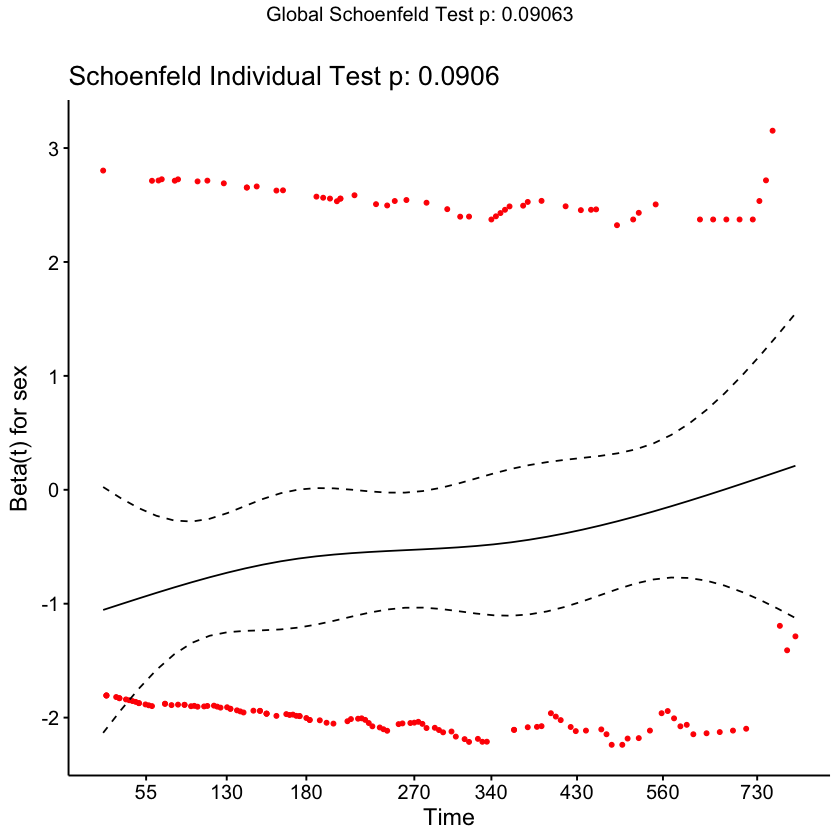

In [15]:
ggcoxzph(test)

In [17]:
predict(fit_cox, type = "terms")

,sex
1,0.2096146
2,0.2096146
3,0.2096146
4,0.2096146
5,0.2096146
6,0.2096146
7,-0.3214090
8,-0.3214090
9,0.2096146
10,0.2096146


# 森林图

Warning message in .get_data(model, data = data):
"The `data` argument is not provided. Data will be extracted from model fit."


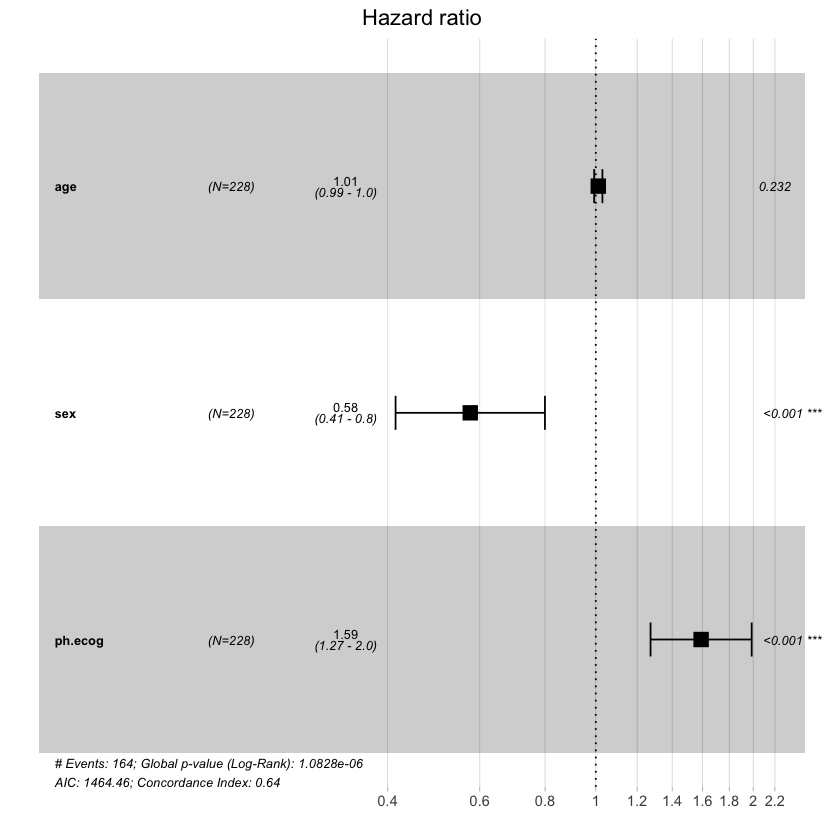

In [19]:
fit_cox <- coxph(
  Surv(time, status) ~ age + sex + ph.ecog,
  data = lung
)

ggforest(fit_cox)

# 分层Cox模型

In [20]:
fit_cox_strata <- coxph(
  Surv(time, status) ~ age + ph.ecog + strata(sex),
  data = lung
)

summary(fit_cox_strata)

Call:
coxph(formula = Surv(time, status) ~ age + ph.ecog + strata(sex), 
    data = lung)

  n= 227, number of events= 164 
   (1 observation deleted due to missingness)

            coef exp(coef) se(coef)     z Pr(>|z|)    
age     0.010566  1.010622 0.009241 1.143    0.253    
ph.ecog 0.462424  1.587919 0.114761 4.029 5.59e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

        exp(coef) exp(-coef) lower .95 upper .95
age         1.011     0.9895    0.9925     1.029
ph.ecog     1.588     0.6298    1.2681     1.988

Concordance= 0.606  (se = 0.027 )
Likelihood ratio test= 19.48  on 2 df,   p=6e-05
Wald test            = 19.63  on 2 df,   p=5e-05
Score (logrank) test = 19.96  on 2 df,   p=5e-05


In [21]:
predict(fit_cox_strata, type = "survival")

1           2           3           4           5           6 
0.365907067 0.394126104 0.132789890 0.607608246 0.121705794 0.020700720 
          7           8           9          10          11          12 
0.476308752 0.350545860 0.604795244 0.580105134 0.712632446 0.122541876 
         13          15          16          17          18          19 
0.171363904 0.176791102 0.747326518 0.106199101 0.015234633 0.952671627 
         20          21          22          23          24          25 
0.870065720 0.413322771 0.964249885 0.150110042 0.504294144 0.422400735 
         26          27          28          29          30          31 
0.366562164 0.309868048 0.546941484 0.336544256 0.951021964 0.392660581 
         32          33          34          35          36          37 
0.903580062 0.098444056 0.869146009 0.877478226 0.849596813 0.007453038 
         38          39          40          41          42          43 
0.077794315 0.739304664 0.153237986 0.200392238 0.777182101 0.636353486 
         44          45          46          47          48          49 
0.827506958 0.121677140 0.866228002 0.540207871 0.202953538 0.199766739 
         50          51          52          53          54          55 
0.115731574 0.101479301 0.740440542 0.945714030 0.676526551 0.090764386 
         56          57          58          59          60          61 
0.925852984 0.993034665 0.693503828 0.270452051 0.606465398 0.241246591 
         62          63          64          65          66          67 
0.605076785 0.661430489 0.977969984 0.704036524 0.813044884 0.632354494 
         68          69          70          71          72          73 
0.207096910 0.426963482 0.523416162 0.149221232 0.699313378 0.975375362 
         74          75          76          77          78          79 
0.824817706 0.767335100 0.462015828 0.430342328 0.552798258 0.989409218 
         80          81          82          83          84          85 
0.764861284 0.184244045 0.849150622 0.682340338 0.870110018 0.101036795 
         86          87          88          89          90          91 
0.444844910 0.320193905 0.836766961 0.182326156 0.562599445 0.222558123 
         92          93          94          95          96          97 
0.503505865 0.858067562 0.732462203 0.491903561 0.892764109 0.645228047 
         98          99         100         101         102         103 
0.367351563 0.210367320 0.899383016 0.531727980 0.412085644 0.354970155 
        104         105         106         107         108         109 
0.822507644 0.548834339 0.730734037 0.406452175 0.985523631 0.297203484 
        110         111         112         113         114         115 
0.353644767 0.966981364 0.694047142 0.419730091 0.834981278 0.406452175 
        116         117         118         119         120         121 
0.931379981 0.474234105 0.063160167 0.267832886 0.272856304 0.378159310 
        122         123         124         125         126         127 
0.703164931 0.324138267 0.846080278 0.299721009 0.586392940 0.869161977 
        128         129         130         131         132         133 
0.893379420 0.142741610 0.587350685 0.684390776 0.635664346 0.574532166 
        134         135         136         137         138         139 
0.446521658 0.643302411 0.209101892 0.528650000 0.176150551 0.268581517 
        140         141         142         143         144         145 
0.557200742 0.640676204 0.247165550 0.351787796 0.955929649 0.257447483 
        146         147         148         149         150         151 
0.595216365 0.489600667 0.741196622 0.945676508 0.753535743 0.521573627 
        152         153         154         155         156         157 
0.436089616 0.758753708 0.847120899 0.641799560 0.192964603 0.510229670 
        158         159         160         161         162         163 
0.273787184 0.662830520 0.535743617 0.657866186 0.749929064 0.247870335 
        164         165         166         167         168         

# 时变Cox模型

In [37]:
# 定义时间变化协变量
tt_function <- function(x, t, ...) {
x * t  # 自定义协变量如何随时间变化
}

fit_cox_TVC <- coxph(
  Surv(time, status) ~ age + sex + ph.ecog + tt(ph.ecog),
  data = lung,
  tt = list(
    ph.ecog = tt_function
  )
)

summary(fit_cox_TVC)

Call:
coxph(formula = Surv(time, status) ~ age + sex + ph.ecog + tt(ph.ecog), 
    data = lung, tt = list(ph.ecog = tt_function))

  n= 227, number of events= 164 
   (1 observation deleted due to missingness)

                  coef  exp(coef)   se(coef)      z Pr(>|z|)    
age          0.0109123  1.0109721  0.0092968  1.174 0.240489    
sex         -0.5518375  0.5758906  0.1678430 -3.288 0.001010 ** 
ph.ecog      0.6618483  1.9383718  0.1945221  3.402 0.000668 ***
tt(ph.ecog) -0.0006960  0.9993042  0.0005556 -1.253 0.210301    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

            exp(coef) exp(-coef) lower .95 upper .95
age            1.0110     0.9891    0.9927    1.0296
sex            0.5759     1.7364    0.4144    0.8002
ph.ecog        1.9384     0.5159    1.3239    2.8380
tt(ph.ecog)    0.9993     1.0007    0.9982    1.0004

Concordance= 0.634  (se = 0.024 )
Likelihood ratio test= 32.09  on 4 df,   p=2e-06
Wald test            = 31.13  on 4 df,   p=3e-0

In [38]:
# 定义时间变化协变量
tt_function <- function(x, t, ...) {
x * log(t)  # 自定义协变量如何随时间变化
}

fit_cox_TVC <- coxph(
  Surv(time, status) ~ age + sex + ph.ecog + tt(ph.ecog),
  data = lung,
  tt = list(
    ph.ecog = tt_function
  )
)

summary(fit_cox_TVC)

Call:
coxph(formula = Surv(time, status) ~ age + sex + ph.ecog + tt(ph.ecog), 
    data = lung, tt = list(ph.ecog = tt_function))

  n= 227, number of events= 164 
   (1 observation deleted due to missingness)

                 coef exp(coef)  se(coef)      z Pr(>|z|)   
age          0.010985  1.011046  0.009279  1.184  0.23648   
sex         -0.551629  0.576011  0.167769 -3.288  0.00101 **
ph.ecog      0.825123  2.282160  0.605070  1.364  0.17267   
tt(ph.ecog) -0.068193  0.934080  0.112104 -0.608  0.54299   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

            exp(coef) exp(-coef) lower .95 upper .95
age            1.0110     0.9891    0.9928    1.0296
sex            0.5760     1.7361    0.4146    0.8003
ph.ecog        2.2822     0.4382    0.6971    7.4711
tt(ph.ecog)    0.9341     1.0706    0.7498    1.1636

Concordance= 0.635  (se = 0.024 )
Likelihood ratio test= 30.87  on 4 df,   p=3e-06
Wald test            = 30.15  on 4 df,   p=5e-06
Score (logrank) te